<a href="https://colab.research.google.com/github/Fuad-Khan/2_Class_Religious_Abuse_Models/blob/main/2_class_Religious_Deep_Learning_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM Model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 128)       │     1,536,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,589,698 (6.06 MB)

 Trainable params: 1,589,698 (6.06 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/6
136/136 ━━━━━━━━━━━━━━━━━━━━ 39s 270ms/step - accuracy: 0.6866 - loss: 0.6255 - val_accuracy: 0.7070 - val_loss: 0.6055
Epoch 2/6
136/136 ━━━━━━━━━━━━━━━━━━━━ 28s 208ms/step - accuracy: 0.7050 - loss: 0.6107 - val_accuracy: 0.7060 - val_loss: 0.6033
Epoch 3/6
136/136 ━━━━━━━━━━━━━━━━━━━━ 43s 221ms/step - accuracy: 0.6974 - loss: 0.6096 - val_accuracy: 0.7081 - val_loss: 0.6025
Epoch 4/6
136/136 ━━━━━━━━━━━━━━━━━━━━ 39s 208ms/step - accuracy: 0.7140 - loss: 0.5932 - val_accuracy: 0.7619 - val_loss: 0.4861
Epoch 5/6
136/136 ━━━━━━━━━━━━━━━━━━━━ 42s 212ms/step - accuracy: 0.7739 - loss: 0.4609 - val_accuracy: 0.7495 - val_loss: 0.4677
Epoch 6/6
136/136 ━━━━━━━━━━━━━━━━━━━━ 28s 208ms/step - accuracy: 0.8076 - loss: 0.4048 - val_accuracy: 0.9275 - val_loss: 0.2053
151/151 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step

✅ Classification Report:
                 precision    recall  f1-score   support

         Normal       0.91      0.99      0.95      3347
Religious Abuse       0.98      0.77 

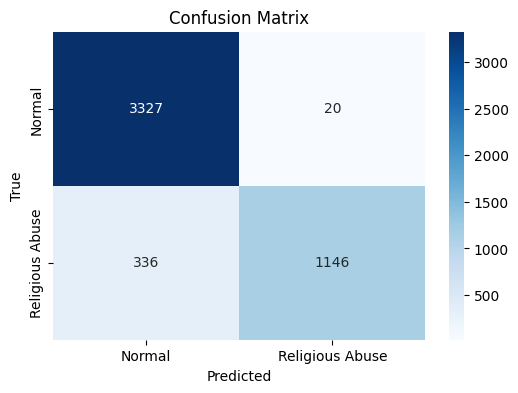

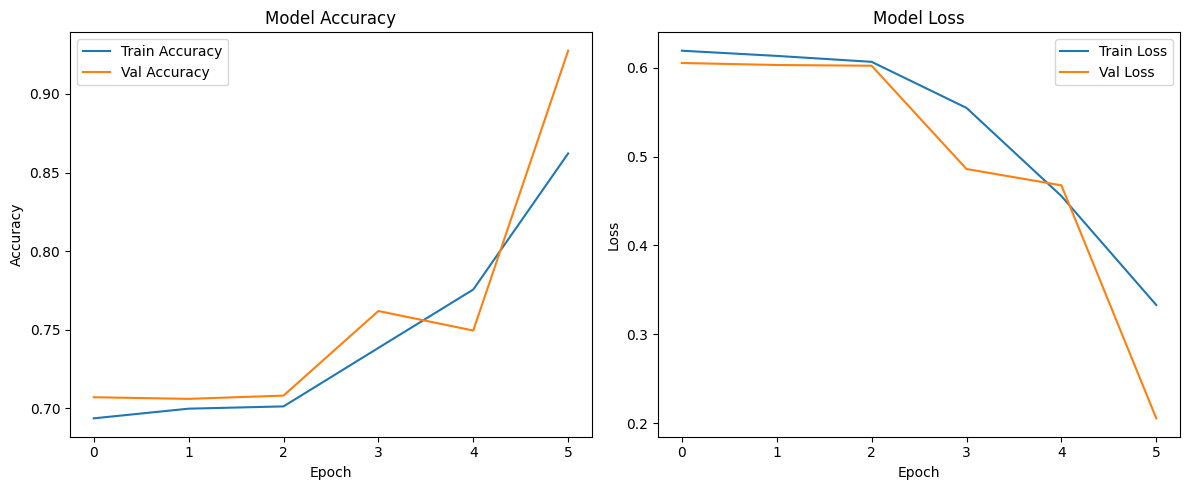

✅ Model saved as 'lstm_religious_2class_model.h5'
✅ Tokenizer saved as 'lstm_tokenizer_2class.pkl'


In [2]:
# ✅ 1. Install required packages (Uncomment if needed)
# !pip install -q tensorflow pandas scikit-learn

# ✅ 2. Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import pickle

# ✅ 3. Load Dataset
file_path = "/content/drive/MyDrive/Research Paper/Data Preprocessing/2 Class/Cleaned_Labeled_Religious_Comments_Numeric_v4.csv"
df = pd.read_csv(file_path)

# ✅ 4. Prepare Data
texts = df['comment'].astype(str).values
labels = df['label_numeric'].values  # 2 classes: 0, 1

# Convert labels to categorical (2 classes)
labels_cat = to_categorical(labels, num_classes=2)

# ✅ 5. Tokenization and Padding
vocab_size = 12000
max_length = 100
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, maxlen=max_length, padding='post')

# ✅ 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(padded, labels_cat, test_size=0.2, random_state=42)

# ✅ 7. Build LSTM Model
model = Sequential([
    Embedding(vocab_size, 128, input_length=max_length),
    LSTM(64),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')  # 2-class classification
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.build(input_shape=(None, max_length))
model.summary()

# ✅ 8. Train Model
history = model.fit(X_train, y_train, epochs=6, batch_size=128, validation_split=0.1)

# ✅ 9. Evaluate Model
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\n✅ Classification Report:")
print(classification_report(y_true, y_pred, target_names=['Normal', 'Religious Abuse'], zero_division=0))

# ✅ 10. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Religious Abuse'],
            yticklabels=['Normal', 'Religious Abuse'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ✅ 11. Plot Accuracy & Loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# ✅ 12. Save Model and Tokenizer
model.save('/content/drive/MyDrive/Research Paper/Models/2 Class/Deep Learning Models/lstm_religious_2class_model.h5')

with open('/content/drive/MyDrive/Research Paper/Models/2 Class/Deep Learning Models/lstm_tokenizer_2class.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

print("✅ Model saved as 'lstm_religious_2class_model.h5'")
print("✅ Tokenizer saved as 'lstm_tokenizer_2class.pkl'")


# CNN-LSTM model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/6
136/136 ━━━━━━━━━━━━━━━━━━━━ 28s 178ms/step - accuracy: 0.6895 - loss: 0.6038 - val_accuracy: 0.9249 - val_loss: 0.2552
Epoch 2/6
136/136 ━━━━━━━━━━━━━━━━━━━━ 40s 169ms/step - accuracy: 0.9514 - loss: 0.1538 - val_accuracy: 0.9607 - val_loss: 0.1190
Epoch 3/6
136/136 ━━━━━━━━━━━━━━━━━━━━ 41s 172ms/step - accuracy: 0.9863 - loss: 0.0507 - val_accuracy: 0.9612 - val_loss: 0.1357
Epoch 4/6
136/136 ━━━━━━━━━━━━━━━━━━━━ 41s 173ms/step - accuracy: 0.9943 - loss: 0.0259 - val_accuracy: 0.9586 - val_loss: 0.1588
Epoch 5/6
136/136 ━━━━━━━━━━━━━━━━━━━━ 42s 177ms/step - accuracy: 0.9963 - loss: 0.0182 - val_accuracy: 0.9596 - val_loss: 0.1869
Epoch 6/6
136/136 ━━━━━━━━━━━━━━━━━━━━ 22s 161ms/step - accuracy: 0.9965 - loss: 0.0143 - val_accuracy: 0.9425 - val_loss: 0.2270
151/151 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step

Classification Report:

                 precision    recall  f1-score   support

         Normal       0.97      0.94      0.96      3347
Religious Abuse       0.88      0.93  

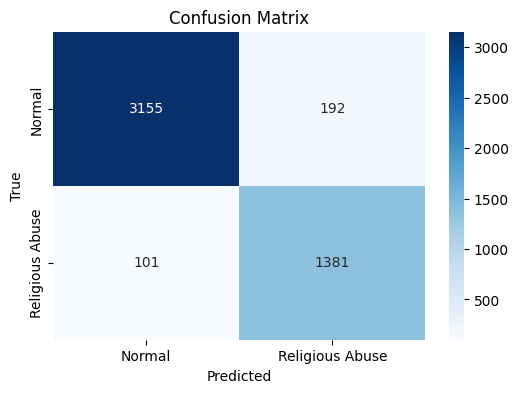

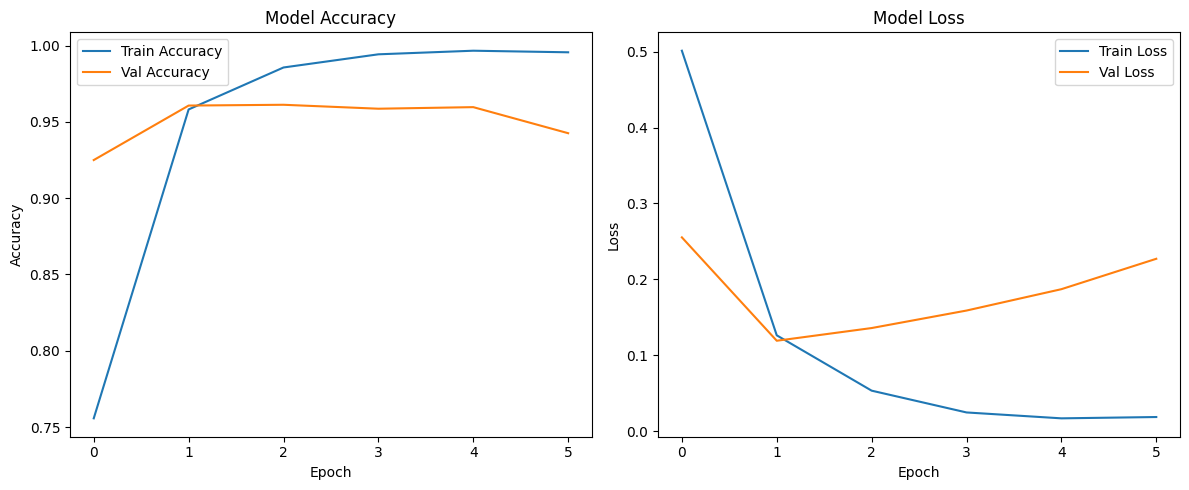

✅ Model saved as 'cnn-lstm_religious_binary_model.h5'
✅ Tokenizer saved as 'cnn-lstm_tokenizer_binary.pkl'


In [3]:
# 1. Install required packages if needed (uncomment below lines for Colab)
# !pip install -q tensorflow pandas scikit-learn

# 2. Import libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dropout, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# ✅ 3. Load dataset
file_path = "/content/drive/MyDrive/Research Paper/Data Preprocessing/2 Class/Cleaned_Labeled_Religious_Comments_Numeric_v4.csv"
df = pd.read_csv(file_path)

# ✅ 4. Filter only 2 labels: 0 = Normal, 1 = Religious Abuse
df = df[df['label_numeric'].isin([0, 1])]

# ✅ 5. Preprocess data
texts = df['comment'].astype(str).values
labels = df['label_numeric'].values  # 2 classes: 0, 1

# ✅ 6. Tokenization & padding
vocab_size = 12000
max_length = 100

tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, maxlen=max_length, padding='post')

# ✅ 7. Train/test split
X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=0.2, random_state=42)

# ✅ 8. CNN-LSTM Binary Classification Model
model = Sequential([
    Embedding(vocab_size, 128, input_length=max_length),
    Conv1D(64, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    LSTM(64),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary output
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# ✅ 9. Train model
history = model.fit(X_train, y_train, epochs=6, batch_size=128, validation_split=0.1)

# ✅ 10. Evaluate model
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Normal', 'Religious Abuse']))

# ✅ 11. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Religious Abuse'],
            yticklabels=['Normal', 'Religious Abuse'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ✅ 12. Training History Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# ✅ 13. Save model and tokenizer
model.save('/content/drive/MyDrive/Research Paper/Models/2 Class/Deep Learning Models/cnn-lstm_religious_binary_model.h5')
with open('/content/drive/MyDrive/Research Paper/Models/2 Class/Deep Learning Models/cnn-lstm_tokenizer_binary.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

print("✅ Model saved as 'cnn-lstm_religious_binary_model.h5'")
print("✅ Tokenizer saved as 'cnn-lstm_tokenizer_binary.pkl'")


# Bi-LSTM

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 128)       │     1,536,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,643,202 (6.27 MB)

 Trainable params: 1,643,202 (6.27 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/6
136/136 ━━━━━━━━━━━━━━━━━━━━ 54s 365ms/step - accuracy: 0.7796 - loss: 0.4442 - val_accuracy: 0.9410 - val_loss: 0.1503
Epoch 2/6
136/136 ━━━━━━━━━━━━━━━━━━━━ 49s 364ms/step - accuracy: 0.9684 - loss: 0.0946 - val_accuracy: 0.9498 - val_loss: 0.1439
Epoch 3/6
136/136 ━━━━━━━━━━━━━━━━━━━━ 81s 361ms/step - accuracy: 0.9890 - loss: 0.0403 - val_accuracy: 0.9498 - val_loss: 0.1556
Epoch 4/6
136/136 ━━━━━━━━━━━━━━━━━━━━ 80s 346ms/step - accuracy: 0.9928 - loss: 0.0242 - val_accuracy: 0.9555 - val_loss: 0.1696
Epoch 5/6
136/136 ━━━━━━━━━━━━━━━━━━━━ 50s 367ms/step - accuracy: 0.9954 - loss: 0.0189 - val_accuracy: 0.9513 - val_loss: 0.2133
Epoch 6/6
136/136 ━━━━━━━━━━━━━━━━━━━━ 48s 354ms/step - accuracy: 0.9917 - loss: 0.0253 - val_accuracy: 0.9451 - val_loss: 0.2454
151/151 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step

Classification Report:

                 precision    recall  f1-score   support

         Normal       0.94      0.98      0.96      3347
Religious Abuse       0.96      0.86  

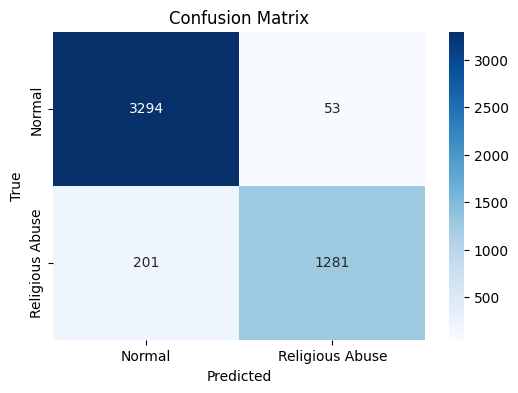

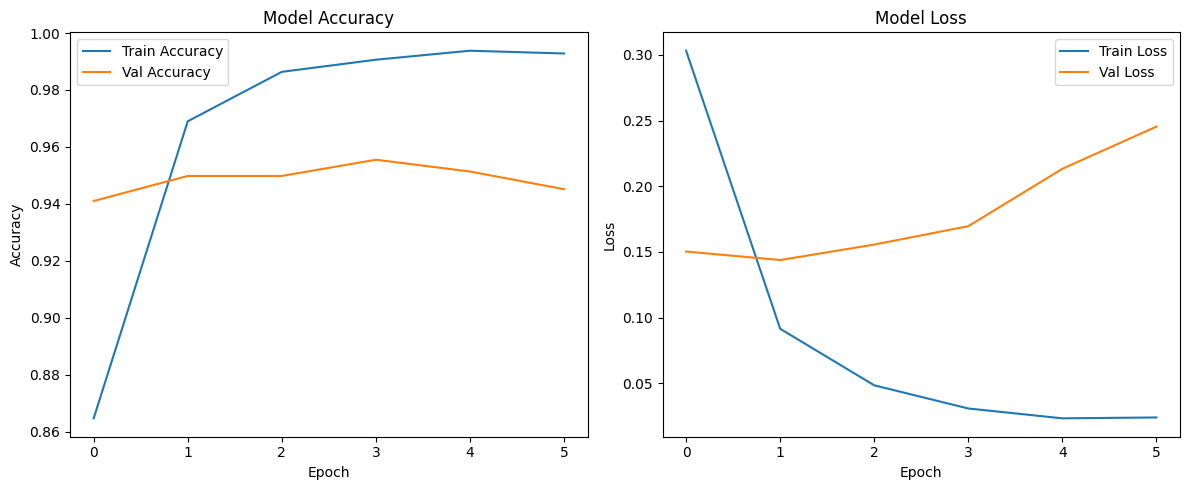

✅ Model saved as 'bi-lstm_religious_2label_model.h5'
✅ Tokenizer saved as 'bi-lstm_tokenizer_2label.pkl'


In [1]:
# Core libraries
import pandas as pd
import numpy as np
import pickle

# TensorFlow / Keras
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense
from tensorflow.keras.utils import to_categorical

# Train–test split
from sklearn.model_selection import train_test_split

# Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Load dataset
file_path = "/content/drive/MyDrive/Research Paper/Data Preprocessing/2 Class/Cleaned_Labeled_Religious_Comments_Numeric_v4.csv"
df = pd.read_csv(file_path)

# ✅ Filter for 2 labels only: 0 = Normal, 1 = Religious Abuse
df = df[df['label_numeric'].isin([0, 1])]
texts = df['comment'].astype(str).values
labels = df['label_numeric'].values

# ✅ Convert labels to one-hot encoding
labels_cat = to_categorical(labels, num_classes=2)

# ✅ Tokenize and pad
vocab_size = 12000
max_length = 100

tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, maxlen=max_length, padding='post')

# ✅ Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(padded, labels_cat, test_size=0.2, random_state=42)

# ✅ Bi-LSTM Model (2 classes)
model = Sequential([
    Embedding(vocab_size, 128, input_length=max_length),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')  # 2 output classes
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.build(input_shape=(None, max_length))
model.summary()

# ✅ Train the model
history = model.fit(X_train, y_train, epochs=6, batch_size=128, validation_split=0.1)

# ✅ Evaluation
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=['Normal', 'Religious Abuse']))

# ✅ Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Religious Abuse'],
            yticklabels=['Normal', 'Religious Abuse'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ✅ Plot Accuracy & Loss
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# ✅ Save model and tokenizer
model.save('/content/drive/MyDrive/Research Paper/Models/2 Class/Deep Learning Models/bi-lstm_religious_2label_model.h5')

with open('/content/drive/MyDrive/Research Paper/Models/2 Class/Deep Learning Models/bi-lstm_tokenizer_2label.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

print("✅ Model saved as 'bi-lstm_religious_2label_model.h5'")
print("✅ Tokenizer saved as 'bi-lstm_tokenizer_2label.pkl'")


# RNN Model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 100, 128)       │     1,536,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 64)             │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,552,642 (5.92 MB)

 Trainable params: 1,552,642 (5.92 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/6
136/136 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - accuracy: 0.6690 - loss: 0.6299 - val_accuracy: 0.6977 - val_loss: 0.6121
Epoch 2/6
136/136 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.6854 - loss: 0.6033 - val_accuracy: 0.6972 - val_loss: 0.6152
Epoch 3/6
136/136 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.6833 - loss: 0.6308 - val_accuracy: 0.6977 - val_loss: 0.6171
Epoch 4/6
136/136 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.6861 - loss: 0.6263 - val_accuracy: 0.7008 - val_loss: 0.6150
Epoch 5/6
136/136 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.6999 - loss: 0.6172 - val_accuracy: 0.7060 - val_loss: 0.6256
Epoch 6/6
136/136 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - accuracy: 0.7050 - loss: 0.6094 - val_accuracy: 0.7065 - val_loss: 0.6087
151/151 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step

RNN Classification Report:

                 precision    recall  f1-score   support

         Normal       0.70      0.99      0.82      3347
Religious Abuse       0.78      0.05      

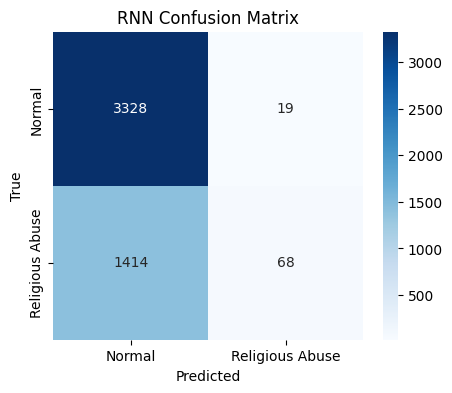

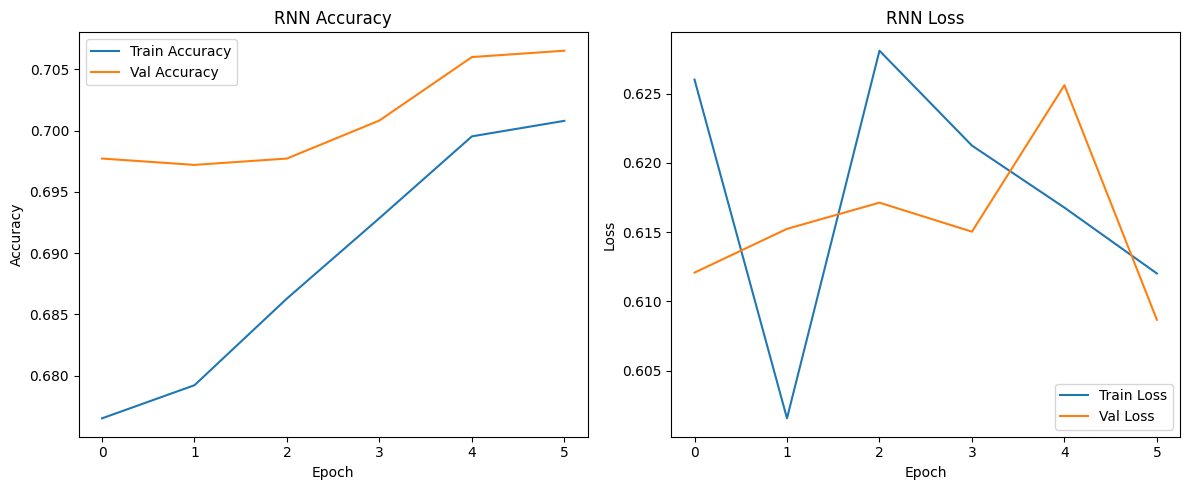

✅ Model saved to: /content/drive/MyDrive/Research Paper/Models/2 Class/Deep Learning Models/rnn_religious_abuse_model.h5
✅ Tokenizer saved to: /content/drive/MyDrive/Research Paper/Models/2 Class/Deep Learning Models/rnn_tokenizer.pkl


In [4]:
# ✅ Core Libraries
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ TensorFlow / Keras
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dropout, Dense
from tensorflow.keras.utils import to_categorical

# ✅ Sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# ✅ Step 1: Load Dataset (must contain only 2 labels: 0 and 1)
file_path = "/content/drive/MyDrive/Research Paper/Data Preprocessing/2 Class/Cleaned_Labeled_Religious_Comments_Numeric_v4.csv"
df = pd.read_csv(file_path)

# ✅ Step 2: Prepare Text and Labels
texts = df['comment'].astype(str).values
labels = df['label_numeric'].values  # 0 = Normal, 1 = Religious Abuse
labels_cat = to_categorical(labels, num_classes=2)

# ✅ Step 3: Tokenization and Padding
vocab_size = 12000
max_length = 100

tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, maxlen=max_length, padding='post')

# ✅ Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(padded, labels_cat, test_size=0.2, random_state=42)

# ✅ Step 5: Build RNN Model for 2 labels
rnn_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),
    SimpleRNN(64, return_sequences=False),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')  # Only 2 classes now
])

rnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
rnn_model.build(input_shape=(None, max_length))
rnn_model.summary()

# ✅ Step 6: Train Model
rnn_history = rnn_model.fit(X_train, y_train, epochs=6, batch_size=128, validation_split=0.1)

# ✅ Step 7: Evaluation
y_pred_probs_rnn = rnn_model.predict(X_test)
y_pred_rnn = np.argmax(y_pred_probs_rnn, axis=1)
y_true_rnn = np.argmax(y_test, axis=1)

print("\nRNN Classification Report:\n")
print(classification_report(y_true_rnn, y_pred_rnn, target_names=['Normal', 'Religious Abuse']))

# ✅ Confusion Matrix
cm_rnn = confusion_matrix(y_true_rnn, y_pred_rnn)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_rnn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Religious Abuse'],
            yticklabels=['Normal', 'Religious Abuse'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('RNN Confusion Matrix')
plt.show()

# ✅ Step 8: Plot Training History
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(rnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='Val Accuracy')
plt.title('RNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(rnn_history.history['loss'], label='Train Loss')
plt.plot(rnn_history.history['val_loss'], label='Val Loss')
plt.title('RNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# ✅ Step 9: Save Model and Tokenizer
model_path = '/content/drive/MyDrive/Research Paper/Models/2 Class/Deep Learning Models/rnn_religious_abuse_model.h5'
tokenizer_path = '/content/drive/MyDrive/Research Paper/Models/2 Class/Deep Learning Models/rnn_tokenizer.pkl'

rnn_model.save(model_path)
with open(tokenizer_path, 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

print(f"✅ Model saved to: {model_path}")
print(f"✅ Tokenizer saved to: {tokenizer_path}")
